In [264]:
import string
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import TweetTokenizer
from textblob import TextBlob

In [265]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/coich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/coich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [266]:
df = pd.read_csv('food.tsv', sep = '\t', encoding='latin-1')
df.head(1)

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...


In [267]:
df['text'] = [BeautifulSoup(review, 'html.parser').get_text() for review in df['text']]
reviews = df['text']

In [268]:
import re

counting(reviews)

def counting(reviews):
    tags = []

    for review in reviews:
        tag = re.findall('<[^<>]*>', review)
        if tag:
            tags.append(tag)

    tags = [item for tag in tags for item in tag]
    counter_tags = Counter(tags)
    print(counter_tags.most_common(10))


[('<>', 4), ('<g>', 2), ('<just pour the powder to 32oz water bottle and shake well - directions on the box say to use 500ml(16.9oz) but the tea is really strong so we use 1L bottle)>', 1), ('<grin>', 1), ('<sigh>', 1), ('<smile>', 1), ('<VBG>', 1)]


### Preprocessing sentences

In [269]:
tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
reviews_tokenized = reviews.apply(tokenizer.tokenize)
reviews_tokenized.head(1)

0    [I, have, bought, several, of, the, Vitality, ...
Name: text, dtype: object

In [270]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.add('fdsg')

reviews_tokenized = reviews_tokenized.apply(lambda review: [item for item in review if item not in stop])
reviews_tokenized.head(1)

0    [I, bought, several, Vitality, canned, dog, fo...
Name: text, dtype: object

In [271]:
from nltk import wordpunct_tokenize
punctuation = string.punctuation

reviews_tokenized = reviews_tokenized.apply(lambda review: [item for item in review if item not in punctuation])
reviews_tokenized.head(1)

0    [I, bought, several, Vitality, canned, dog, fo...
Name: text, dtype: object

In [234]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()

reviews_tokenized = reviews_tokenized.apply(lambda review: [lancaster_stemmer.stem(item) for item in review])
reviews_tokenized.head(1)

0    [i, bought, sev, vit, can, dog, food, produc, ...
Name: text, dtype: object

In [272]:
flat_reviews_list = [item for review in reviews_tokenized for item in review]
counter_words = Counter(flat_reviews_list)
counter_words.most_common(10)

[('I', 82172),
 ('like', 13936),
 ('The', 11560),
 ('good', 10571),
 ('taste', 9272),
 ('coffee', 9235),
 ('one', 8630),
 ('This', 8202),
 ('great', 8138),
 ('product', 8025)]

In [273]:
reviews_clean = [' '.join(review).lower() for review in reviews_tokenized]

df['clean_text'] = reviews_clean

In [274]:
def stars_to_sentiment(score):
    if score in [1, 2] :
        return 'negative'
    elif score in [4, 5] :
        return 'positive'
    else:
        return 'neutral'

In [275]:
df['score'] = pd.to_numeric(df['score'], downcast = 'integer')

df['sentiment'] = df['score'].apply(stars_to_sentiment)
df.head(1)

,productid,userid,score,text,clean_text,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,positive


In [276]:
df.to_csv('clean_dataset.csv', sep = ';', index=False)

In [304]:
df = pd.read_csv('clean_dataset.csv', sep = ';', encoding='latin-1')
df.head()

,productid,userid,score,text,clean_text,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,positive
1,B00813GRG4,A1D87F6ZCVE5NK,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts ....,negative
2,B000LQOCH0,ABXLMWJIXXAIN,4,This is a confection that has been around a fe...,this confection around centuries it light pill...,positive
3,B000UA0QIQ,A395BORC6FGVXV,2,If you are looking for the secret ingredient i...,if looking secret ingredient robitussin i beli...,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...,positive


### Some classification

In [308]:
def polarity(text_clean):
    line = TextBlob(text_clean)
    return line.sentiment.polarity

def subjectivity(text_clean):
    line = TextBlob(text_clean)
    return line.sentiment.subjectivity

In [309]:
df['polarity'] = df['clean_text'].apply(polarity)
df['subjectivity'] = df['clean_text'].apply(subjectivity)
df.head(1)

,productid,userid,score,text,clean_text,sentiment,polarity,subjectivity
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,positive,0.425,0.4


In [313]:
def sentiment_number(sentiment):
    if sentiment == 'negative':
        return -1
    elif sentiment == 'positive':
        return 1
    else:
        return 0

In [314]:
df['sentiment'] = df['sentiment'].apply(sentiment_number)
df.head(1)

,productid,userid,score,text,clean_text,sentiment,polarity,subjectivity
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,1,0.425,0.4


In [376]:
score_counter = Counter((df['score']-3)/2)
sentiment_counter = Counter(df['sentiment'])
polarity_counter = Counter(df['polarity'].round(1))

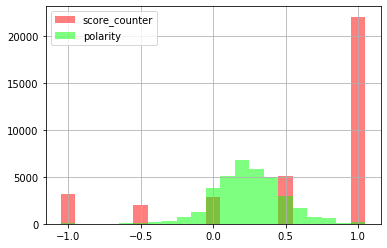

In [379]:
import matplotlib.pyplot as plt

legend = []
labels = []
colors = ['#ff0000', '#00ff00', '#0000ff']
positions = list(range(len(stars)))

legend.append(plt.bar(list(score_counter.keys()), list(score_counter.values()), \
                      width = 0.1, color = colors[0], alpha = 0.5)[0])
labels.append('score_counter')

#legend.append(plt.bar(list(sentiment_counter.keys()), list(sentiment_counter.values()), width = 0.1, color = colors[0])[0])
#labels.append('sentiment')

legend.append(plt.bar(list(polarity_counter.keys()), list(polarity_counter.values()), \
                      width = 0.1, color = colors[1], alpha = 0.5)[0])
labels.append('polarity')

plt.grid(True)
plt.legend(legend, labels)
plt.show()